In [2]:
import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="7"
# import tensorflow as tf
# gpu_options = tf.GPUOptions(allow_growth=True)
# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# from keras.models import load_model
from helper import *
from utils import *

import numpy as np
import cv2
from tqdm import tqdm
import glob
import os.path as osp
import random
from PIL import Image
from scipy import ndimage
from spatial_transformer import transformer
import numpy as np
from tf_utils import weight_variable, bias_variable, dense_to_one_hot
import matplotlib.pyplot as plt


/data2/wangpengxiao/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [ ]:
# mod = load_model('mod.h5')

In [ ]:
# source_data_path = "/data4/wangpengxiao/zalando"
# source_img_path = glob.glob(osp.join(source_data_path,'*.jpg'))  
# source_img_path = sorted(source_img_path)

# random_crop_path = "/data4/wangpengxiao/zalando_random_crop"
# random_crop_img_path = glob.glob(osp.join(random_crop_path,'*.jpg')) 
# random_crop_img_path = sorted(random_crop_img_path)

# region_picture_path = "/data4/wangpengxiao/zalando_region_picture"
# region_img_path = glob.glob(osp.join(region_picture_path,'*.jpg')) 
# region_img_path = sorted(region_img_path)


# STL_path = '/data4/wangpengxiao/zalando_STL'
# STL_img_path = glob.glob(osp.join(STL_path,'*.jpg')) 
# STL_img_path = sorted(STL_img_path)

# final_path = '/data4/wangpengxiao/zalando_final'

# c = 0

# for path in tqdm(source_img_path):
#     c += 1
#     if c > 30144 :
#         path = osp.join(STL_path, osp.basename(path))
#         ori_img = Image.open(path)
#         #第一步：step2 of paper： STL
#         #因为已经预处理好了就直接用了

#         #第二步：step1 of paper： paste
#         color = get_dominant_color(ori_img)#but get color first 

#         patch_num = np.random.randint(4, 12)
#         region_num = np.random.randint(4, 12)
#         for i in range(patch_num):
#             patch_img = Image.open(random.choice(random_crop_img_path))
#             ori_img = Random_paste_patch_img(ori_img, patch_img)
#         for i in range(region_num):
#             region_img = Image.open(random.choice(region_img_path))
#             ori_img = Random_paste_region_img(ori_img, region_img)

#         #第三步: step3 of paper： spray
#         img = np.array(ori_img)
#         h = int(img.shape[0]/30)
#         w = int(img.shape[1]/30)
#         a_x = np.random.randint(0, h)
#         a_y = np.random.randint(0, w)
#         b_x = np.random.randint(0, h)
#         b_y = np.random.randint(0, w)
#         begin_point = np.array([min(a_x,b_x),a_y])
#         end_point = np.array([max(a_x,b_x),b_y])
#         tan = (begin_point[1] - end_point[1]) / (begin_point[0] - end_point[0]+0.001)


#         center_point_list = []
#         for i in range(begin_point[0],end_point[0]+1):
#             a = i
#             b = (i-begin_point[0])*tan + begin_point[1]
#             center_point_list.append(np.array([int(a),int(b)]))
#         center_point_list = np.array(center_point_list)    


#         lamda = np.random.randint(5, 11)/100#一个超参
#         paper = np.zeros((h,w,3))
#         mask = np.zeros((h,w))
#         center = [int(h/2),int(w/2)]
#         #color = get_dominant_color(Image.fromarray(img))#提取图片主要色
#         paper[center[0],center[1],:] = color
#         for i in range(h):
#             for j in range(w):
#                 dis = min_dis([i, j],center_point_list)
#                 paper[i,j,:] = np.array(color)/np.exp(lamda*dis)#*lamda/dis
#                 mask[i,j] = np.array([255])/np.exp(lamda*dis)#*lamda/dis

#         paper = (paper).astype('uint8')
#         mask = (mask).astype('uint8')

#         mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
#         im = cv2.resize(paper, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
#         imq = Image.fromarray(im)
#         imp = ori_img.copy()

#         imp.paste(imq,(0, 0, imp.size[0], imp.size[1]),mask = Image.fromarray(mask))

#         imp.save(osp.join(final_path, osp.basename(path)))    
#     else:
#         continue

In [4]:
# source_data_path = "/data4/wangpengxiao/danbooru2017/original"
# source_img_path = glob.glob(osp.join(source_data_path,'*/*.jpg'))
# source_img_path += glob.glob(osp.join(source_data_path,'*/*.png'))
# source_img_path = sorted(source_img_path)

random_crop_path = "/data4/wangpengxiao/zalando_random_crop"
random_crop_img_path = glob.glob(osp.join(random_crop_path,'*.jpg')) 
random_crop_img_path = sorted(random_crop_img_path)

region_picture_path = "/data4/wangpengxiao/zalando_region_picture"
region_img_path = glob.glob(osp.join(region_picture_path,'*.jpg')) 
region_img_path = sorted(region_img_path)


STL_path = '/data4/wangpengxiao/danbooru2017/original_STL'
STL_img_path = glob.glob(osp.join(STL_path,'*.jpg')) 
STL_img_path += glob.glob(osp.join(STL_path,'*.png')) 
STL_img_path = sorted(STL_img_path)

final_path = '/data4/wangpengxiao/danbooru2017/original_final'

In [ ]:
def process(parts, region_img_path):
    for path in tqdm(parts):
        ori_img = Image.open(path)
        #第一步：step2 of paper： STL
        #因为已经预处理好了就直接用了

        #第二步：step1 of paper： paste
        color = get_dominant_color(ori_img)#but get color first 

        patch_num = np.random.randint(1, 3)
        region_num = np.random.randint(1, 3)
    #     for i in range(patch_num):
    #         patch_img = Image.open(random.choice(random_crop_img_path))
    #         ori_img = Random_paste_patch_img(ori_img, patch_img)
        for i in range(region_num):
            region_img = Image.open(random.choice(region_img_path))
            ori_img = Random_paste_region_img(ori_img, region_img)

        #第三步: step3 of paper： spray
        img = np.array(ori_img)
        h = int(img.shape[0]/30)
        w = int(img.shape[1]/30)
        a_x = np.random.randint(0, h)
        a_y = np.random.randint(0, w)
        b_x = np.random.randint(0, h)
        b_y = np.random.randint(0, w)
        begin_point = np.array([min(a_x,b_x),a_y])
        end_point = np.array([max(a_x,b_x),b_y])
        tan = (begin_point[1] - end_point[1]) / (begin_point[0] - end_point[0]+0.001)


        center_point_list = []
        for i in range(begin_point[0],end_point[0]+1):
            a = i
            b = (i-begin_point[0])*tan + begin_point[1]
            center_point_list.append(np.array([int(a),int(b)]))
        center_point_list = np.array(center_point_list)    


        lamda = np.random.randint(40, 60)/100#一个超参
        paper = np.zeros((h,w,3))
        mask = np.zeros((h,w))
        center = [int(h/2),int(w/2)]
        #color = get_dominant_color(Image.fromarray(img))#提取图片主要色
        paper[center[0],center[1],:] = color
        for i in range(h):
            for j in range(w):
                dis = min_dis([i, j],center_point_list)
                paper[i,j,:] = np.array(color)/np.exp(lamda*dis)#*lamda/dis
                mask[i,j] = np.array([255])/np.exp(lamda*dis)#*lamda/dis

        paper = (paper).astype('uint8')
        mask = (mask).astype('uint8')

        mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
        im = cv2.resize(paper, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
        imq = Image.fromarray(im)
        imp = ori_img.copy()

        imp.paste(imq,(0, 0, imp.size[0], imp.size[1]),mask = Image.fromarray(mask))

        imp.save(osp.join(final_path, osp.basename(path)))   


In [3]:
l = len(STL_img_path) // 32

In [4]:
parts = []
for i in range(31):
    parts.append(STL_img_path[l*i:l*(i+1)])
parts.append(STL_img_path[l*31:])

In [14]:
import multiprocessing
p =[]
for i in range(32):
    p.append(multiprocessing.Process(target = process, args = (parts[i],region_img_path)))

for i in range(32):
    p[i].start()


  0%|          | 11/40370 [00:05<5:14:19,  2.14it/s]

  File "/data2/wangpengxiao/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-22:
Process Process-19:

Traceback (most recent call last):

Traceback (most recent call last):
Process Process-24:
  File "/data2/wangpengxiao/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Process Process-23:
  File "/data2/wangpengxiao/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "<ipython-input-13-1ecde94ff0c9>", line 17, in process
    ori_img = Random_paste_region_img(ori_img, region_img)
Traceback (most recent call last):
  File "/data2/wangpengxiao/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/data2/wangpengxiao/GANs/style2paints_V3/utils.py", line 226, in Random_paste_region_img
    tem[coordin

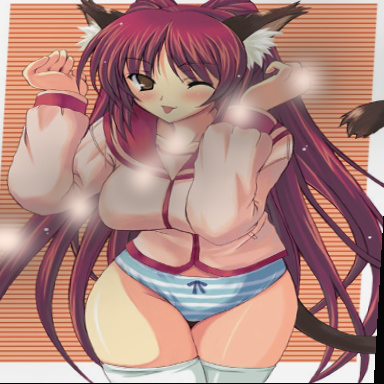

In [282]:
#第三步: step3 of paper： spray
ori_img = Image.open(STL_img_path[0])
color = get_dominant_color(ori_img)#but get color first
img = np.array(ori_img)
h = int(img.shape[0]/30)
w = int(img.shape[1]/30)
a_x = np.random.randint(0, h)
a_y = np.random.randint(0, w)
b_x = np.random.randint(0, h)
b_y = np.random.randint(0, w)
begin_point = np.array([min(a_x,b_x),a_y])
end_point = np.array([max(a_x,b_x),b_y])
tan = (begin_point[1] - end_point[1]) / (begin_point[0] - end_point[0]+0.001)


center_point_list = []
for i in range(begin_point[0],end_point[0]+1):
    a = i
    b = (i-begin_point[0])*tan + begin_point[1]
    center_point_list.append(np.array([int(a),int(b)]))
center_point_list = np.array(center_point_list)    


lamda = 0.1*10#一个超参
paper = np.zeros((h,w,3))
mask = np.zeros((h,w))
center = [int(h/2),int(w/2)]
#color = get_dominant_color(Image.fromarray(img))#提取图片主要色
paper[center[0],center[1],:] = color
for i in range(h):
    for j in range(w):
        dis = min_dis([i, j],center_point_list)
        paper[i,j,:] = np.array(color)/np.exp(lamda*dis)#*lamda/dis
        mask[i,j] = np.array([255])/np.exp(lamda*dis)#*lamda/dis

paper = (paper).astype('uint8')
mask = (mask).astype('uint8')

mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
im = cv2.resize(paper, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
imq = Image.fromarray(im)
imp = ori_img.copy()

imp.paste(imq,(0, 0, imp.size[0], imp.size[1]),mask = Image.fromarray(mask))

imp  

In [283]:
print(lamda)

1.0


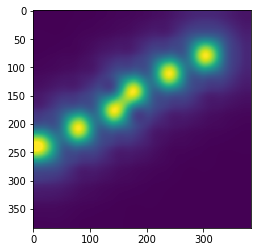

In [284]:
plt.imshow(mask)

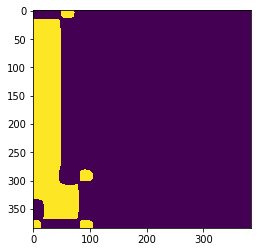

In [171]:
co = np.where(mask != 0)
mask[co[0],co[1]] = 255
plt.imshow(mask)

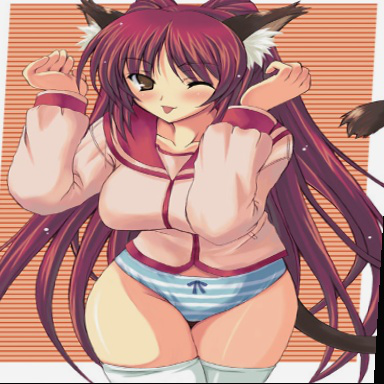

In [103]:
Image.open(STL_img_path[0])

In [281]:
random.uniform(0.1, 0.9) 

0.5128252019333942

In [209]:
STL_path = '/data4/wangpengxiao/danbooru2017/original_STL'
STL_img_path = glob.glob(osp.join(STL_path,'*.jpg')) 
STL_img_path += glob.glob(osp.join(STL_path,'*.png')) 
STL_img_path = sorted(STL_img_path)

In [148]:
len(STL_img_path)

1291856

In [149]:
df_path = glob.glob(osp.join(final_path, '*.jpg'))
df_path += glob.glob(osp.join(final_path, '*.png'))
len(df_path)

1291756

In [154]:
def diff(listA,listB):
    #求交集
    return list(set(listA).intersection(set(listB)))

In [155]:
df_base_name_list = []
for path in df_path:
    df_base_name_list.append(osp.basename(path))


In [156]:
STL_base_name_list = []
for path in tqdm(STL_img_path):
    STL_base_name_list.append(osp.basename(path))

100%|██████████| 1291856/1291856 [00:02<00:00, 596132.97it/s]


In [157]:
list_all = diff(STL_base_name_list,df_base_name_list)

In [159]:
len(list_all)

1291756

In [161]:
rm_name = list(set(STL_base_name_list) - set(list_all))


In [162]:
for name in rm_name:
    os.system('rm {}'.format(osp.join('/data4/wangpengxiao/danbooru2017/original_STL',name)))

In [163]:
STL_path = '/data4/wangpengxiao/danbooru2017/original_STL'
STL_img_path = glob.glob(osp.join(STL_path,'*.jpg')) 
STL_img_path += glob.glob(osp.join(STL_path,'*.png')) 
STL_img_path = sorted(STL_img_path)
len(STL_img_path)

1291756